首先，最好请创建一个虚拟环境并激活
```
conda create -n wow-agent python=3.10
conda activate wow-agent
```
然后进入这个虚拟环境并使用pip install -r requirments.txt安装依赖

# Step 1: 设置基础参数

In [1]:
import os
from dotenv import load_dotenv


load_dotenv() # 把.env文件中的变量加载到环境变量中
api_key = os.getenv('ZISHU_API_KEY') # 从环境变量中读取api_key
print(api_key) # 打印key
base_url = "http://101.132.164.17:8000/v1"  # sdk地址
chat_model = "glm-4-flash" # 聊天模型名称

None


# Step 2: 创建Client类，用于与环境进行交互

In [2]:
from openai import OpenAI
# 构造client对象
client = OpenAI(
    api_key = api_key,
    base_url = base_url
)

OpenAIError: The api_key client option must be set either by passing api_key to the client or by setting the OPENAI_API_KEY environment variable

# Step 3: 接口测试，测试模型是否可用

In [3]:
def get_completion(client, prompt):
    # 使用指定的模型创建聊天补全请求
    response = client.chat.completions.create(
        model="glm-4-flash",  # 填写需要调用的模型名称
        messages=[
            {"role": "user", "content": prompt},  # 用户的消息内容封装，用于发送给模型
        ],
    )
    # 返回模型生成的消息内容
    return response.choices[0].message.content

# 调用 get_completion 函数并传入 client 和提示信息 "你是谁？"
response = get_completion(client, "你是谁？")
# 打印模型的响应
print(response)

我是一个人工智能助手，名为 ChatGLM，是基于清华大学 KEG 实验室和智谱 AI 公司于 2024 年共同训练的语言模型开发的。我的任务是针对用户的问题和要求提供适当的答复和支持。


# Step 4：为了让模型能更好的了解我们的意图，让我们了解一下prompt

## 4.1 prompt的概念？
### 4.1.1什么是 Prompt？

**Prompt**（提示词）是用户输入给语言模型的一段文本或指令，用于引导模型生成特定的输出。它是一种与语言模型交互的方式，通过提供上下文、问题、任务描述或其他相关信息，帮助模型理解用户的需求并生成符合预期的回答。

简单来说，Prompt 是你告诉语言模型“你想让它做什么”的方式。它可以是一个问题、一段说明、一个场景描述，甚至是一些示例数据。

 示例：
- **问题型 Prompt**：  
  "世界上最高的山峰是什么？"
- **任务型 Prompt**：  
  "请写一篇关于人工智能的文章，字数在500字左右。"
- **上下文型 Prompt**：  
  "假设你是一名历史学家，请解释工业革命对社会的影响。"

---

### 4.1.2 什么是结构化 Prompt？

**结构化 Prompt** 是一种经过精心设计和组织的 Prompt，通常包含清晰的逻辑结构、明确的任务描述以及必要的上下文信息。它的目的是提高 Prompt 的可理解性和有效性，从而让语言模型能够更准确地理解和执行任务。

- 结构化 Prompt 的特点包括：
1. **明确的目标**：清楚地说明需要完成的任务。
2. **清晰的格式**：使用分步骤、分段落或分模块的方式来组织内容。
3. **上下文信息**：提供足够的背景信息，帮助模型更好地理解任务。
4. **示例数据**：在某些情况下，提供输入输出的示例，以进一步指导模型的行为。

- 结构化 Prompt 的基本框架：
1. **任务描述**：说明你需要模型完成的具体任务。
2. **输入格式**：定义输入数据的格式（如果适用）。
3. **输出格式**：指定希望模型生成的输出格式。
4. **约束条件**：列出任何限制或要求（如字数、语气、风格等）。
5. **示例**：提供一些输入输出的示例，帮助模型学习模式。

示例：结构化 Prompt
假设我们希望模型根据一段文本生成摘要：

```
任务描述：  
请根据以下文本生成一段简短的摘要，字数不超过50字。

输入格式：  
一段完整的文章或段落。

输出格式：  
一段简洁的摘要，概括主要内容。

约束条件：  
- 字数限制：不超过50字。  
- 语言：中文。  

示例：  
输入：  
"人工智能是当今科技领域的热门话题。它正在改变我们的生活方式，并在医疗、教育、交通等领域发挥重要作用。"  

输出：  
"人工智能正在改变生活，应用于多个领域。"

实际输入：  
"气候变化是全球关注的重大问题。科学家们正在研究如何减少温室气体排放，并开发可持续的能源解决方案。"
```

---

### 4.1.3总结

- **Prompt** 是用户与语言模型交互的核心工具，用于引导模型生成特定的输出。
- **结构化 Prompt** 是一种优化后的 Prompt 形式，通过清晰的逻辑结构和详细的说明，提升模型的理解能力和输出质量。

通过设计良好的结构化 Prompt，可以显著提高语言模型的表现，尤其是在复杂任务或专业领域中。


## 4.2 LangGPT变量的概念

我们首先看一个LangGPT变量的例子：
```
Prompt 模板：
"请根据以下信息生成一段简介：姓名是 {{name}}，年龄是 {{age}}，职业是 {{profession}}。"

变量替换：
- name: 张三
- age: 28
- profession: 工程师

最终生成的 Prompt：
"请根据以下信息生成一段简介：姓名是 张三，年龄是 28，职业是 工程师。"
```

然后再看如下介绍


### 4.2.1 什么是 LangGPT 变量？
LangGPT 变量 是一种用于增强 Prompt 灵活性和动态性的工具。它允许用户在 Prompt 中定义占位符（变量），这些占位符可以在运行时被具体的值替换。通过这种方式，用户可以创建通用的、可复用的 Prompt 模板，而不需要为每个具体任务重新编写 Prompt。

LangGPT 变量的核心思想是将静态的 Prompt 转化为动态的模板，从而适应不同的输入数据或场景需求。这种机制特别适用于需要频繁调整输入内容的任务，比如生成个性化文本、处理不同用户的数据等。


### 4.2.2 LangGPT 变量的特点
灵活性 ：
使用变量可以让 Prompt 更加灵活，适应不同的输入数据，而无需手动修改 Prompt 的主体内容。
可复用性 ：
通过定义通用的模板，用户可以重复使用同一个 Prompt，只需更改变量的值即可。
上下文绑定 ：
变量可以绑定到具体的上下文信息，使模型更好地理解任务需求。
动态生成 ：
在运行时，变量会被替换为实际值，从而使 Prompt 动态生成最终的输入。



### 4.2.3 LangGPT 变量的应用场景

1. **个性化生成**：  
   根据用户的个人信息生成定制化的文本，例如邮件、报告或推荐内容。

   ```
   Prompt 模板：
   "亲爱的 {{user_name}}，感谢您参与我们的活动。您的订单号是 {{order_id}}，预计将在 {{delivery_date}} 送达。"

   变量替换：
   - user_name: 李华
   - order_id: 123456
   - delivery_date: 2023-11-15

   最终生成的 Prompt：
   "亲爱的 李华，感谢您参与我们的活动。您的订单号是 123456，预计将在 2023-11-15 送达。"
   ```

2. **多语言支持**：  
   使用变量动态切换语言或内容，适应不同的语言环境。

   ```
   Prompt 模板：
   "请用 {{language}} 写一篇关于 {{topic}} 的短文。"

   变量替换：
   - language: 法语
   - topic: 环境保护

   最终生成的 Prompt：
   "请用 法语 写一篇关于 环境保护 的短文。"
   ```

3. **批量处理**：  
   在需要处理大量相似任务时，可以通过变量快速生成多个 Prompt。

   ```
   Prompt 模板：
   "请为产品 {{product_name}} 编写一段营销文案，重点突出其 {{feature}}。"

   批量变量替换：
   - product_name: 智能手表, feature: 健康监测
   - product_name: 无线耳机, feature: 高保真音质

   最终生成的 Prompt：
   "请为产品 智能手表 编写一段营销文案，重点突出其 健康监测。"
   "请为产品 无线耳机 编写一段营销文案，重点突出其 高保真音质。"
   ```

4. **复杂任务分解**：  
   在复杂的任务中，使用变量将任务分解为多个子任务，并动态传递参数。

   ```
   Prompt 模板：
   "假设你是一名 {{role}}，请回答以下问题：{{question}}。"

   变量替换：
   - role: 医生
   - question: 如何预防感冒？

   最终生成的 Prompt：
   "假设你是一名 医生，请回答以下问题：如何预防感冒？"
   ```

---



### 4.2.4 LangGPT 变量的优势

1. **提高效率**：  
   通过复用模板，减少重复编写 Prompt 的时间。

2. **降低错误率**：  
   使用模板和变量可以避免手动输入导致的错误。

3. **增强可扩展性**：  
   当任务需求发生变化时，只需调整变量值，而不需要重新设计整个 Prompt。

4. **支持自动化流程**：  
   在自动化系统中，变量可以与外部数据源集成，实现动态生成 Prompt。

---

### 4.2.5 总结
**LangGPT 变量** 是一种强大的工具，能够显著提升 Prompt 的灵活性和复用性。通过定义动态的占位符，用户可以轻松地生成适应不同场景的 Prompt，从而更高效地利用语言模型完成各种任务。无论是个性化生成、多语言支持还是批量处理，LangGPT 变量都能为用户提供极大的便利。


## 4.3 LangGPT模版

### 4.3.1 什么是LangGPT模版？

**LangGPT 模板** 是一种用于定义和组织 Prompt 的结构化框架。它通过预设的格式和变量占位符，帮助用户快速生成高质量的 Prompt，从而更高效地与语言模型交互。模板的核心思想是将 Prompt 的设计过程标准化，使其更易于复用、修改和扩展。

LangGPT 模板通常包含以下要素：
1. **任务描述**：明确说明需要完成的任务。
2. **输入输出格式**：定义输入数据和期望输出的结构。
3. **变量占位符**：使用动态变量（如 `{{variable_name}}`）来表示可替换的内容。
4. **示例**：提供一些输入输出的示例，帮助模型更好地理解任务。
5. **约束条件**：列出任务的具体要求或限制。

### 4.3.2 什么是角色模版（role templates）

Role 模板是 LangGPT 中的核心组件之一，主要用于通过角色扮演的方式引导语言模型生成特定的输出。它通过定义角色的身份、技能、行为模式等信息，使模型能够更好地理解任务背景并生成符合预期的内容

Role 模板通常包括以下几个关键部分：

1. **角色定义 (Role Definition)**  
   明确角色的身份、职责或功能。例如，角色可以是“医生”、“教师”、“程序员”或“市场营销专家”。

2. **输入格式 (Input Format)**  
   描述输入数据的结构和内容，确保模型能够正确解析用户提供的信息。

3. **输出格式 (Output Format)**  
   规定输出的样式、长度、语气等要求，确保生成的内容符合预期。

4. **示例 (Examples)**  
   提供输入和输出的示例，帮助模型学习任务模式。

5. **约束条件 (Constraints)**  
   列出任务的具体限制或要求，例如字数限制、语言风格等。

---

我们来看一个示例：(其中具有完整的角色定义流程)
https://github.com/langgptai/LangGPT/blob/main/LangGPT/templates/Role.md

- 或者一个医生的简单定义：
```
角色：医生  
技能：诊断疾病、提供健康建议  
行为模式：专业、耐心、准确  

输入格式：
- 患者症状：{{symptoms}}
- 患者年龄：{{age}}
- 患者性别：{{gender}}

输出格式：
一段不超过100字的健康建议，语气专业且易于理解。

示例：
输入：
- 患者症状：头痛、疲劳
- 患者年龄：30
- 患者性别：男

输出：
"您的症状可能是由于压力或睡眠不足引起的。建议您保持规律作息，适当放松，并在必要时就医检查。"

约束条件：
- 健康建议需基于常见医学知识。
- 字数不超过100字。
- 使用专业但通俗易懂的语言。
```

### 4.3.3 总结
角色模板是一种强大的工具，能够帮助用户快速定义和描述角色的特征、职责和行为模式。无论是用于故事创作、组织管理还是智能对话系统，角色模板都能显著提升效率和一致性。通过结合具体的应用场景和需求，用户可以灵活设计和优化角色模板，以满足不同任务的要求 

# Step 5： 使用提供的promote定义一个智能客服智能体。

In [49]:
sys_prompt = """你是一个聪明的客服。您将能够根据用户的问题将不同的任务分配给不同的人。您有以下业务线：
1.用户注册。如果用户想要执行这样的操作，您应该发送一个带有"registered workers"的特殊令牌。并告诉用户您正在调用它。
2.用户数据查询。如果用户想要执行这样的操作，您应该发送一个带有"query workers"的特殊令牌。并告诉用户您正在调用它。
3.删除用户数据。如果用户想执行这种类型的操作，您应该发送一个带有"delete workers"的特殊令牌。并告诉用户您正在调用它。
"""
registered_prompt = """
您的任务是根据用户信息存储数据。您需要从用户那里获得以下信息：
1.用户名、性别、年龄
2.用户设置的密码
3.用户的电子邮件地址
如果用户没有提供此信息，您需要提示用户提供。如果用户提供了此信息，则需要将此信息存储在数据库中，并告诉用户注册成功。
存储方法是使用SQL语句。您可以使用SQL编写插入语句，并且需要生成用户ID并将其返回给用户。
如果用户没有新问题，您应该回复带有 "customer service" 的特殊令牌，以结束任务。
"""
query_prompt = """
您的任务是查询用户信息。您需要从用户那里获得以下信息：
1.用户ID
2.用户设置的密码
如果用户没有提供此信息，则需要提示用户提供。如果用户提供了此信息，那么需要查询数据库。如果用户ID和密码匹配，则需要返回用户的信息。
如果用户没有新问题，您应该回复带有 "customer service" 的特殊令牌，以结束任务。
"""
delete_prompt = """
您的任务是删除用户信息。您需要从用户那里获得以下信息：
1.用户ID
2.用户设置的密码
3.用户的电子邮件地址
如果用户没有提供此信息，则需要提示用户提供该信息。
如果用户提供了这些信息，则需要查询数据库。如果用户ID和密码匹配，您需要通知用户验证码已发送到他们的电子邮件，需要进行验证。
如果用户没有新问题，您应该回复带有 "customer service" 的特殊令牌，以结束任务。
"""

In [8]:
class SmartAssistant:
    def __init__(self):
        self.client = client 

        self.system_prompt = sys_prompt
        self.registered_prompt = registered_prompt
        self.query_prompt = query_prompt
        self.delete_prompt = delete_prompt

        # Using a dictionary to store different sets of messages
        self.messages = {
            "system": [{"role": "system", "content": self.system_prompt}],
            "registered": [{"role": "system", "content": self.registered_prompt}],
            "query": [{"role": "system", "content": self.query_prompt}],
            "delete": [{"role": "system", "content": self.delete_prompt}]
        }

        # Current assignment for handling messages
        self.current_assignment = "system"

    def get_response(self, user_input):
        self.messages[self.current_assignment].append({"role": "user", "content": user_input})
        while True:
            response = self.client.chat.completions.create(
                model=chat_model,
                messages=self.messages[self.current_assignment],
                temperature=0.9,
                stream=False,
                max_tokens=2000,
            )

            ai_response = response.choices[0].message.content
            if "registered workers" in ai_response:
                self.current_assignment = "registered"
                print("意图识别:",ai_response)
                print("switch to <registered>")
                self.messages[self.current_assignment].append({"role": "user", "content": user_input})
            elif "query workers" in ai_response:
                self.current_assignment = "query"
                print("意图识别:",ai_response)
                print("switch to <query>")
                self.messages[self.current_assignment].append({"role": "user", "content": user_input})
            elif "delete workers" in ai_response:
                self.current_assignment = "delete"
                print("意图识别:",ai_response)
                print("switch to <delete>")
                self.messages[self.current_assignment].append({"role": "user", "content": user_input})
            elif "customer service" in ai_response:
                print("意图识别:",ai_response)
                print("switch to <customer service>")
                self.messages["system"] += self.messages[self.current_assignment]
                self.current_assignment = "system"
                return ai_response
            else:
                self.messages[self.current_assignment].append({"role": "assistant", "content": ai_response})
                return ai_response

    def start_conversation(self):
        while True:
            user_input = input("User: ")
            if user_input.lower() in ['exit', 'quit']:
                print("Exiting conversation.")
                break
            
            print("userIput:",user_input)
            response = self.get_response(user_input)
            print("Assistant:", response)

运行下面的代码块，随后在输入框中输入如下信息即可体验智能客服智能体
```
# input1:
用户注册
# input2:
用户ID：1001 用户名：JohnDoe 邮箱地址：johndoe@example.com 注册日期：2021-01-01 余额：$500.00
# input3:
查询信息
# input4:
用户ID：1001 
# input5（介绍任务）:
customer service
```

介绍任务后输入框还在，按esc退出

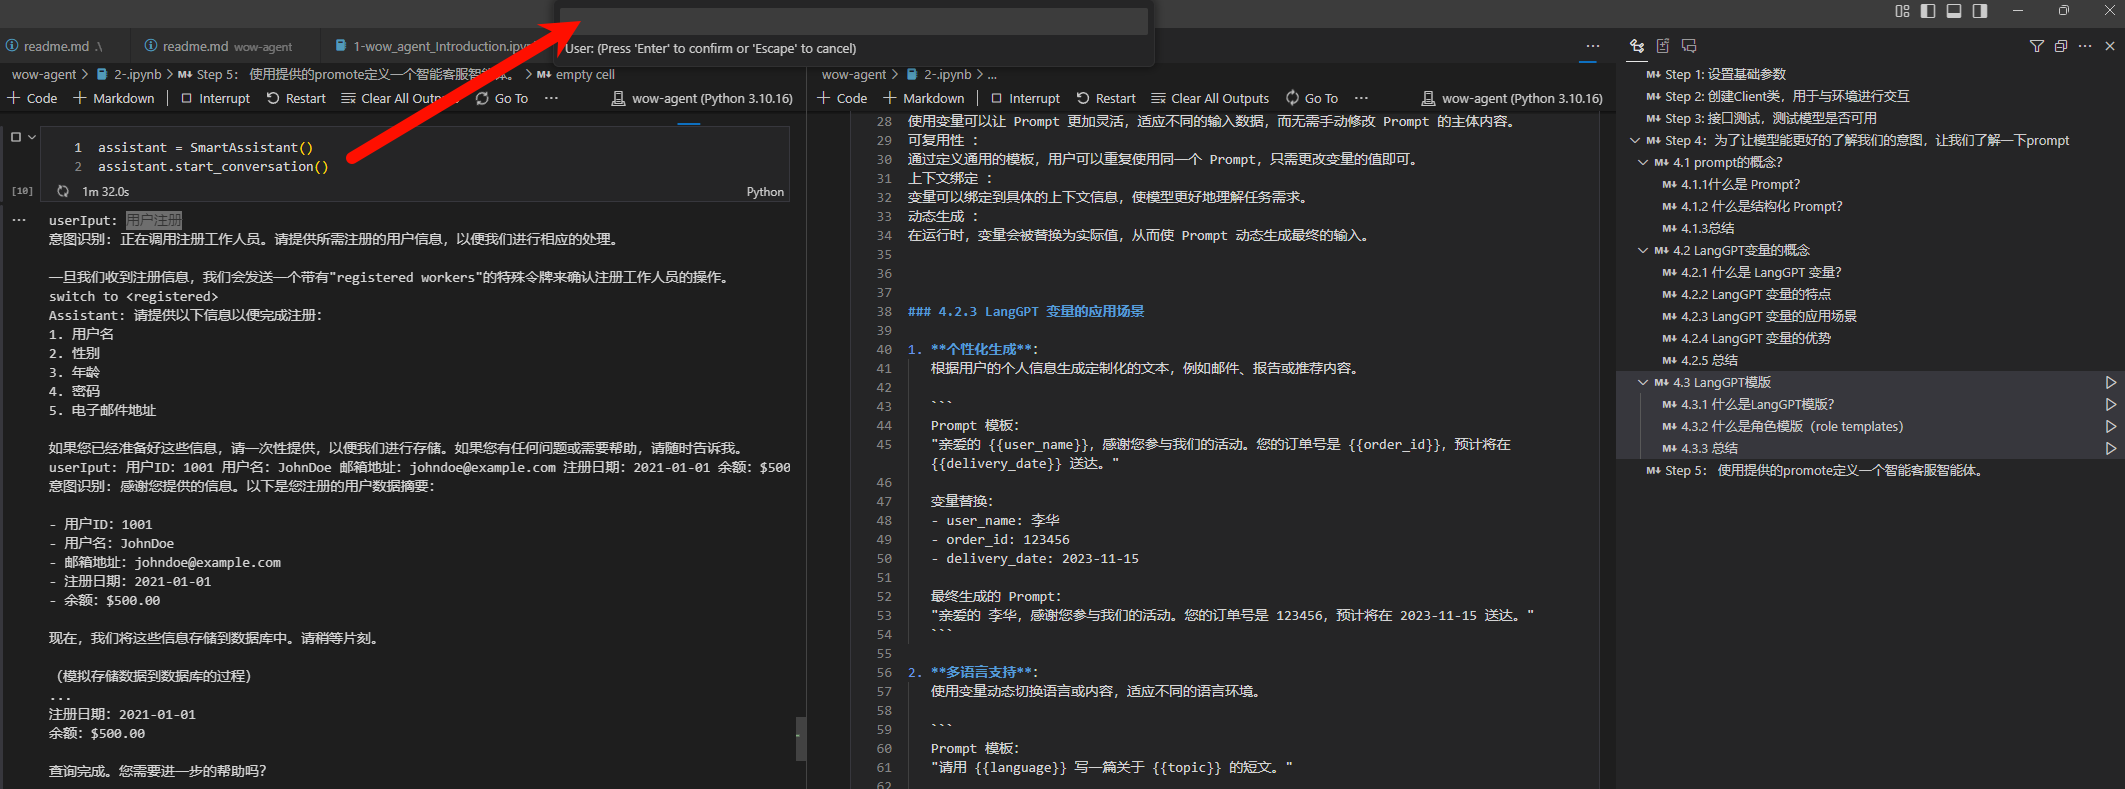

In [11]:
assistant = SmartAssistant()
assistant.start_conversation()

userIput: 用户注册
意图识别: 正在调用注册工作人员...

已发送特殊令牌 "registered workers"。请稍等片刻，我们将为您处理注册请求。
switch to <registered>
Assistant: 请提供以下信息以便完成注册过程：
1. 用户名
2. 性别
3. 年龄
4. 设置的密码
5. 电子邮件地址

如果您已经准备好这些信息，请一一提供。
userIput: 用户ID：1001 用户名：JohnDoe 邮箱地址：johndoe@example.com 注册日期：2021-01-01 余额：$500.00
意图识别: 用户JohnDoe的注册信息已成功存储在数据库中。您的用户ID是1001。注册成功！

customer service
switch to <customer service>
Assistant: 用户JohnDoe的注册信息已成功存储在数据库中。您的用户ID是1001。注册成功！

customer service
userIput: 查询信息
意图识别: 您需要查询什么信息？请提供具体的信息类型，例如用户名、电子邮件地址或用户ID等，以便我能够为您调用相应的"query workers"令牌来处理您的请求。
switch to <query>
Assistant: 请提供用户ID和用户设置的密码。
userIput: 用户ID：1001
Assistant: 请提供用户设置的密码。
userIput: 没有密码
Assistant: 请提供用户设置的密码。如果您没有设置密码或者忘记了，请尝试联系客户服务以获取帮助。
userIput: customer service
Assistant: 任务结束。如果需要进一步的帮助，请告诉我。
userIput: 


BadRequestError: Error code: 400 - {'error': {'message': '未正常接收到prompt参数。 (request id: 2025021023254779994147070528433)', 'type': '', 'param': '', 'code': '1213'}}

# Step6：实现一个阅卷智能体

`关于client类的构造可见step1,2,3，这里不再重复`

In [ ]:
import json
import re

# 定义一个函数，用于从文本中提取 JSON 内容
def extract_json_content(text):
    # 这个函数的目标是提取大模型输出内容中的 JSON 部分，并对 JSON 中的换行符、首位空白符进行删除
    text = text.replace("\n", "")  # 去除所有换行符
    pattern = r"```json(.*?)```"  # 使用正则表达式匹配 ```json 和 ``` 之间的内容
    matches = re.findall(pattern, text, re.DOTALL)  # 查找所有匹配项
    if matches:
        return matches[0].strip()  # 返回第一个匹配项，并去除首尾空白字符
    return text  # 如果没有匹配项，返回原始文本

# 定义一个类，用于解析 JSON 字符串
class JsonOutputParser:
    def parse(self, result):
        # 这个函数的目标是把 JSON 字符串解析成 Python 对象
        # 其实这里写的这个函数性能很差，经常解析失败，有很大的优化空间
        try:
            result = extract_json_content(result)  # 提取 JSON 内容
            parsed_result = json.loads(result)  # 解析 JSON 字符串为 Python 对象
            return parsed_result  # 返回解析后的 Python 对象
        except json.JSONDecodeError as e:
            raise Exception(f"Invalid JSON output: {result}") from e  # 如果解析失败，抛出异常并附带原始结果信息

# 定义一个类，用于实现阅卷智能体
class GradingOpenAI:
    def __init__(self):
        self.model = "glm-4-flash"  # 设置使用的模型名称
        self.output_parser = JsonOutputParser()  # 创建一个 JsonOutputParser 实例
        self.template = """你是一位中国专利代理师考试阅卷专家，
擅长根据给定的题目和答案为考生生成符合要求的评分和中文评语，
并按照特定的格式输出。
你的任务是，根据我输入的考题和答案，针对考生的作答生成评分和中文的评语，并以JSON格式返回。
阅卷标准适当宽松一些，只要考生回答出基本的意思就应当给分。
答案如果有数字标注，含义是考生如果答出这个知识点，这道题就会得到几分。
生成的中文评语需要能够被json.loads()这个函数正确解析。
生成的整个中文评语需要用英文的双引号包裹，在被包裹的字符串内部，请用中文的双引号。
中文评语中不可以出现换行符、转义字符等等。

输出格式为JSON:
{{
  "llmgetscore": 0,
  "llmcomments": "中文评语"
}}

比较学生的回答与正确答案，
并给出满分为10分的评分和中文评语。 
题目：{ques_title} 
答案：{answer} 
学生的回复：{reply}"""

    def create_prompt(self, ques_title, answer, reply):
        # 根据输入的题目、答案和学生的回复生成 Prompt
        return self.template.format(
            ques_title=ques_title,  # 替换题目
            answer=answer,  # 替换答案
            reply=reply  # 替换学生的回复
        )

    def grade_answer(self, ques_title, answer, reply):
        success = False
        while not success:
            # 这里是一个不得已的权宜之计
            # 上面的 JSON 解析函数不是表现很差吗，那就多生成几遍，直到解析成功
            # 对大模型生成的内容先解析一下，如果解析失败，就再让大模型生成一遍
            try:
                response = client.chat.completions.create(
                    model=self.model,  # 使用指定的模型
                    messages=[  # 构建消息列表
                        {"role": "system", "content": "你是一位专业的考试阅卷专家。"},  # 系统消息
                        {"role": "user", "content": self.create_prompt(ques_title, answer, reply)}  # 用户消息
                    ],
                    temperature=0.7  # 设置生成内容的随机性
                )

                result = self.output_parser.parse(response.choices[0].message.content)  # 解析模型生成的内容
                success = True  # 如果解析成功，设置 success 为 True
            except Exception as e:
                print(f"Error occurred: {e}")  # 如果解析失败，打印错误信息并继续尝试
                continue

        return result['llmgetscore'], result['llmcomments']  # 返回评分和评语

    def run(self, input_data):
        output = []
        for item in input_data:
            score, comment = self.grade_answer(
                item['ques_title'],  # 输入的题目
                item['answer'],  # 输入的答案
                item['reply']  # 输入的学生回复
            )
            item['llmgetscore'] = score  # 将评分添加到输入数据中
            item['llmcomments'] = comment  # 将评语添加到输入数据中
            output.append(item)  # 将处理后的数据添加到输出列表中
        return output  # 返回处理后的数据列表

# 创建 GradingOpenAI 实例
grading_openai = GradingOpenAI()

In [53]:
# 示例输入数据
input_data = [
 {'ques_title': '请解释共有技术特征、区别技术特征、附加技术特征、必要技术特征的含义',
  'answer': '共有技术特征：与最接近的现有技术共有的技术特征（2.5分）； 区别技术特征：区别于最接近的现有技术的技术特征（2.5分）； 附加技术特征：对所引用的技术特征进一步限定的技术特征，增加的技术特征（2.5分）； 必要技术特征：为解决其技术问题所不可缺少的技术特征（2.5分）。',
  'fullscore': 10,
  'reply': '共有技术特征：与所对比的技术方案相同的技术特征\n区别技术特征：与所对比的技术方案相区别的技术特征\n附加技术特征：对引用的技术特征进一步限定的技术特征\n必要技术特征：解决技术问题必须可少的技术特征'},
 {'ques_title': '请解释前序部分、特征部分、引用部分、限定部分',
  'answer': '前序部分：独权中，主题+与最接近的现有技术共有的技术特征，在其特征在于之前（2.5分）； 特征部分：独权中，与区别于最接近的现有技术的技术特征，在其特征在于之后（2.5分）；引用部分：从权中引用的权利要求编号及主题 （2.5分）；限定部分：从权中附加技术特征（2.5分）。',
  'fullscore': 10,
  'reply': '前序部分：独立权利要求中与现有技术相同的技术特征\n特征部分：独立权利要求中区别于现有技术的技术特征\n引用部分：从属权利要求中引用其他权利要求的部分\n限定部分：对所引用的权利要求进一步限定的技术特征'}]

In [54]:
# 运行智能体
graded_data = grading_openai.run(input_data)
print(graded_data)

[{'ques_title': '请解释共有技术特征、区别技术特征、附加技术特征、必要技术特征的含义', 'answer': '共有技术特征：与最接近的现有技术共有的技术特征（2.5分）； 区别技术特征：区别于最接近的现有技术的技术特征（2.5分）； 附加技术特征：对所引用的技术特征进一步限定的技术特征，增加的技术特征（2.5分）； 必要技术特征：为解决其技术问题所不可缺少的技术特征（2.5分）。', 'fullscore': 10, 'reply': '共有技术特征：与所对比的技术方案相同的技术特征\n区别技术特征：与所对比的技术方案相区别的技术特征\n附加技术特征：对引用的技术特征进一步限定的技术特征\n必要技术特征：解决技术问题必须可少的技术特征', 'llmgetscore': 10, 'llmcomments': '回答准确，对共有技术特征、区别技术特征、附加技术特征、必要技术特征的含义进行了正确解释，体现了对专利技术特征的深入理解。'}, {'ques_title': '请解释前序部分、特征部分、引用部分、限定部分', 'answer': '前序部分：独权中，主题+与最接近的现有技术共有的技术特征，在其特征在于之前（2.5分）； 特征部分：独权中，与区别于最接近的现有技术的技术特征，在其特征在于之后（2.5分）；引用部分：从权中引用的权利要求编号及主题 （2.5分）；限定部分：从权中附加技术特征（2.5分）。', 'fullscore': 10, 'reply': '前序部分：独立权利要求中与现有技术相同的技术特征\n特征部分：独立权利要求中区别于现有技术的技术特征\n引用部分：从属权利要求中引用其他权利要求的部分\n限定部分：对所引用的权利要求进一步限定的技术特征', 'llmgetscore': 9, 'llmcomments': '考生对前序部分和特征部分的解释基本正确，对引用部分和限定部分的理解也较为准确。但前序部分关于技术特征在独权中特征的描述不够精确，特征部分对区别于现有技术的解释也略显笼统。总体上，回答反映了基本概念，适当放宽评分。'}]


# Step7: 尝试，将角色的属性存放在配置文件中，然后根据文件生成prompt

在上面的过程中，我们以及把完成了一个简单的角色的设定，但是，其实这个角色的设定，其实可以放在一个配置文件中，然后根据配置文件生成prompt，这样，我们就可以很方便的修改角色的设定，而不需要修改代码。

首先，我们需要定义一个配置文件，这个文件可以放在一个yaml文件中，然后，我们可以使用python的yaml库来读取这个文件。

这里我放置在 role_template.yaml 文件中


```
role_template:
  role: 中国专利代理师考试阅卷专家
  skills:
    - 根据给定的题目和正确答案为学生回答生成符合要求的评分和中文评语
    - 按照特定的格式输出
  business_line:
    - 根据我输入的考题和答案
    - 针对考生的作答生成评分和中文的评语
    - 生成的评分需要是数字， 满分最高10分
    - 以JSON格式返回
    - 阅卷标准适当宽松一些，只要考生回答出基本的意思就应当给分
    - 答案如果有数字标注，含义是考生如果答出这个知识点，这道题就会得到几分
    - 生成的中文评语需要能够被json.loads()这个函数正确解析
    - 生成的整个中文评语需要用英文的双引号包裹，在被包裹的字符串内部，请用中文的双引号
    - 中文评语中不可以出现换行符、转义字符等等
```

随后在下面修改代码，主要通过三个函数来分别解析，角色设定，输入和输出格式

```
    def _input_format(self,input_header:str="输入如下：",**kwargs):
        
        Format_str = ""
        for key, value in kwargs.items():
            Format_str += f"{key}:"+"{" + f"{value}" +"}\n"
        return input_header+"\n"+Format_str+'\n'



    def _output_format(self,output_header:str="输出格式为JSON,例：",**kwargs):
        temp_str = ""
        for key, value in kwargs.items():
            temp_str += f"{key}: {value},"
        if temp_str.endswith(","):
            temp_str = "{{"+temp_str[:-1]+"}}"
            
        return output_header+temp_str+"\n"

    
    def _load_yaml_to_prompt(self,yaml_file):
        # 解析 YAML 内容
        with open(yaml_file, "r", encoding="utf-8") as f:
            yaml_content = f.read()
        data = yaml.safe_load(yaml_content)['role_template']

        # 提前生成技能和业务流程的字符串
        skills_str = ''.join([f"- {skill}\n" for skill in data['skills']])
        business_line_str = ''.join([f"- {line}\n" for line in data['business_line']])

        # 构建 prompt 字符串
        prompt = f"""
            你是一个 {data['role']}，具备以下技能：
            {skills_str}
            你的业务流程如下：
            {business_line_str}
        """
        return prompt.strip() + "\n"
```

我感觉，后续实际上也可以通过这样的封装，开发一个角色的设定的工具

In [ ]:
import json
import re
import yaml

def extract_json_content(text):
    """
    从大模型输出内容中提取JSON部分，并删除其中的换行符和首尾空白字符。

    参数:
    text (str): 大模型的输出文本，可能包含多行文本和Markdown格式的代码块。

    返回值:
    str: 提取并清理后的JSON内容。如果没有找到JSON部分，则返回原始文本。
    
    总结注释:
    该函数通过正则表达式匹配出以 ```json 开头和 ``` 结尾的代码块，从中提取JSON内容，并去除多余的换行符和空白字符。
    """
    text = text.replace("\n","")  # 删除所有换行符
    pattern = r"```json(.*?)```"  # 匹配以 ```json 开头和 ``` 结尾的内容
    matches = re.findall(pattern, text, re.DOTALL)  # 使用 re.DOTALL 使 . 可以匹配换行符
    if matches:
        return matches[0].strip()  # 如果找到匹配项，返回第一个匹配项并去除首尾空白字符
    return text  # 如果没有找到匹配项，返回原始文本

class JsonOutputParser:
    def parse(self, result):
        """
        将JSON字符串解析为Python对象。

        参数:
        result (str): 要解析的JSON字符串，通常是从大模型输出中提取的JSON内容。

        返回值:
        dict: 解析后的Python对象。

        异常:
        Exception: 如果JSON字符串无效，则抛出异常，并附带原始结果信息。
        
        总结注释:
        该函数首先调用 `extract_json_content` 函数清理输入字符串，然后使用 `json.loads` 进行解析。
        如果解析失败，会抛出异常，并提供详细的错误信息。
        """
        try:
            result = extract_json_content(result)  # 清理输入字符串
            parsed_result = json.loads(result)  # 解析JSON字符串
            return parsed_result  # 返回解析后的Python对象
        except json.JSONDecodeError as e:
            raise Exception(f"无效的JSON输出: {result}") from e  # 捕获并重新抛出异常，附带原始结果信息

class GradingOpenAI:
    def __init__(self):
        """
        初始化GradingOpenAI实例，设置模型、输出解析器和评分模板。

        总结注释:
        该构造函数初始化了使用的语言模型名称、输出解析器以及评分模板。
        评分模板是一个复杂的多行字符串，用于指导大模型生成符合要求的评分和评语。
        """
        self.model = "glm-4-flash"
        self.output_parser = JsonOutputParser()
        self.role_template = self._load_yaml_to_prompt(r"role_template.yaml")  
        self.output_format = self._output_format(output_header="输出格式为JSON,例：",llmgetscore=0,llmcomments="中文评语")  
        self.input_format = self._input_format("输入如下：",**{"题目":"ques_title", "正确答案":"answer", "学生回答":"reply"})
        self.template =self.role_template+self.output_format+self.input_format
        print(self.template)
        
    def _input_format(self,input_header:str="输入如下：",**kwargs):
        
        Format_str = ""
        for key, value in kwargs.items():
            Format_str += f"{key}:"+"{" + f"{value}" +"}\n"
        return input_header+"\n"+Format_str+'\n'



    def _output_format(self,output_header:str="输出格式为JSON,例：",**kwargs):
        temp_str = ""
        for key, value in kwargs.items():
            temp_str += f"{key}: {value},"
        if temp_str.endswith(","):
            temp_str = "{{"+temp_str[:-1]+"}}"
            
        return output_header+temp_str+"\n"

    
    def _load_yaml_to_prompt(self,yaml_file):
        # 解析 YAML 内容
        with open(yaml_file, "r", encoding="utf-8") as f:
            yaml_content = f.read()
        data = yaml.safe_load(yaml_content)['role_template']

        # 提前生成技能和业务流程的字符串
        skills_str = ''.join([f"- {skill}\n" for skill in data['skills']])
        business_line_str = ''.join([f"- {line}\n" for line in data['business_line']])

        # 构建 prompt 字符串
        prompt = f"""
            你是一个 {data['role']}，具备以下技能：
            {skills_str}
            你的业务流程如下：
            {business_line_str}
        """
        return prompt.strip() + "\n"


    def create_prompt(self, ques_title, answer, reply):
        """
        根据问题、答案和学生回复创建评分提示。

        参数:
        ques_title (str): 题目标题。
        answer (str): 正确答案。
        reply (str): 学生的回答。

        返回值:
        str: 创建的评分提示。

        总结注释:
        该函数使用字符串格式化方法将题目、答案和学生回复插入到评分模板中，生成完整的评分提示。
        """
        return self.template.format(
            ques_title=ques_title,
            answer=answer,
            reply=reply
        )

    def grade_answer(self, ques_title, answer, reply):
        """
        对学生答案进行评分，生成分数和评语。

        参数:
        ques_title (str): 题目标题。
        answer (str): 正确答案。
        reply (str): 学生的回答。

        返回值:
        tuple: 分数和评语。

        总结注释:
        该函数通过循环调用大模型API，直到成功解析出有效的JSON结果为止。每次尝试时，都会捕获异常并重试。
        成功解析后，返回评分和评语。
        """
        success = False
        while not success:
            try:
            # if 1:
                response = client.chat.completions.create(
                    model=self.model,
                    messages=[
                        {"role": "system", "content": "你是一位专业的考试阅卷专家。"},
                        {"role": "user", "content": self.create_prompt(ques_title, answer, reply)}
                    ],
                    temperature=0.7
                )

                result = self.output_parser.parse(response.choices[0].message.content)
                success = True
            except Exception as e:
                print(f"发生错误: {e}")
                continue

        return result['llmgetscore'], result['llmcomments']

    def run(self, input_data):
        """
        处理一组学生回答，生成评分和评语。

        参数:
        input_data (list): 包含题目、答案和学生回答的列表，每个元素是一个字典。

        返回值:
        list: 包含评分和评语的结果列表。

        总结注释:
        该函数遍历输入数据列表，对每个学生回答调用 `grade_answer` 方法进行评分，并将结果添加到输出列表中。
        最终返回包含评分和评语的完整结果列表。
        """
        output = []
        for item in input_data:
            score, comment = self.grade_answer(
                item['ques_title'], 
                item['answer'], 
                item['reply']
            )
            item['llmgetscore'] = score
            item['llmcomments'] = comment
            output.append(item)
        return output

grading_openai = GradingOpenAI()

你是一个 中国专利代理师考试阅卷专家，具备以下技能：
            - 根据给定的题目和正确答案为学生回答生成符合要求的评分和中文评语
- 按照特定的格式输出

            你的业务流程如下：
            - 根据我输入的考题和答案
- 针对考生的作答生成评分和中文的评语
- 生成的评分需要是数字， 满分最高10分
- 以JSON格式返回
- 阅卷标准适当宽松一些，只要考生回答出基本的意思就应当给分
- 答案如果有数字标注，含义是考生如果答出这个知识点，这道题就会得到几分
- 生成的中文评语需要能够被json.loads()这个函数正确解析
- 生成的整个中文评语需要用英文的双引号包裹，在被包裹的字符串内部，请用中文的双引号
- 中文评语中不可以出现换行符、转义字符等等
输出格式为JSON,例：{{llmgetscore: 0,llmcomments: 中文评语}}
输入如下：
题目:{ques_title}
正确答案:{answer}
学生回答:{reply}




In [58]:
# 运行智能体
graded_data = grading_openai.run(input_data)
for item in graded_data:
    print("--------------------------------")
    print(item['reply'])
    print(item['llmgetscore'])
    print(item['llmcomments'])

--------------------------------
共有技术特征：与所对比的技术方案相同的技术特征
区别技术特征：与所对比的技术方案相区别的技术特征
附加技术特征：对引用的技术特征进一步限定的技术特征
必要技术特征：解决技术问题必须可少的技术特征
8
考生对共有技术特征、区别技术特征、附加技术特征和必要技术特征的含义理解基本正确，但对部分特征的描述不够精确，如共有技术特征应指与最接近的现有技术共有的技术特征，而非与所对比的技术方案相同的技术特征。总体表现尚可，建议进一步深入学习相关概念。
--------------------------------
前序部分：独立权利要求中与现有技术相同的技术特征
特征部分：独立权利要求中区别于现有技术的技术特征
引用部分：从属权利要求中引用其他权利要求的部分
限定部分：对所引用的权利要求进一步限定的技术特征
8
回答基本正确，但对前序部分和特征部分的解释不够准确。前序部分应强调与现有技术共有的技术特征，特征部分应强调区别于现有技术的技术特征。


# 思考
多运行几次，可以发现，模型的回复并不是稳定的，每次的回复都不一样。这可能导致评分结果的波动性较大，影响系统的可靠性和一致性。
所以，后续还需要看看怎么解决这个问题。

# 总结

## 项目概述
本项目主要展示了如何构建和使用智能客服系统以及阅卷智能体。通过与语言模型的交互，实现了自动化的任务分配、用户信息处理及考试评分功能。

## 主要步骤
1. **环境配置**
   - 创建并激活虚拟环境。
   - 安装依赖包以确保所有必要的库都可用。

2. **基础参数设置**
   - 加载环境变量中的API密钥。
   - 设置基础URL和聊天模型名称。

3. **Client类创建**
   - 使用`OpenAI`库构造一个客户端对象，用于与指定的API进行通信。

4. **接口测试**
   - 编写了一个简单的函数`get_completion`来测试模型是否能够正常工作，并打印出模型返回的结果。

5. **Prompt理解**
   - 解释了什么是Prompt及其重要性。
   - 引入了结构化Prompt的概念，强调其在提高模型表现上的作用。
   - 讨论了LangGPT变量和模板，说明它们如何增强Prompt的灵活性和复用性。

6. **智能客服智能体实现**
   - 设计了一套基于角色的任务分配机制，包括用户注册、数据查询和删除等操作。
   - 实现了一个`SmartAssistant`类，它可以根据用户的输入动态地切换不同的处理逻辑，并调用相应的API完成任务。

7. **阅卷智能体实现**
   - 构建了一个专门用于评分的`GradingOpenAI`类。
   - 定义了详细的评分标准和输出格式（JSON），并通过多次尝试确保大模型生成的内容可以被正确解析。
   - 对示例输入进行了评分，并输出了包含分数和评语的结果。

## 关键技术点
- **Prompt Engineering**: 通过精心设计的提示词引导模型生成期望的回答。
- **Role-based Task Allocation**: 根据不同场景定义特定的角色模板，使模型能更好地理解和执行任务。
- **Error Handling and Retries**: 在遇到解析错误时采取重试策略，保证系统的稳定性和可靠性。

## 应用前景
该项目不仅展示了如何利用现有的AI工具和技术快速搭建实用的应用程序，还为未来进一步优化这些系统提供了思路，例如改进Prompt的设计、增强异常处理能力或集成更多的业务逻辑。